In [150]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('2019.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

# Data info

- **Country**
- **Ladder** measure of life satisfaction.
- **Standard** Deviation of Ladder
- **Positive affect** Measure of positive emotion.
- **Negative affect** Measure of negative emotion.
- **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
- **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
- **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
- **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
- **Log of GDP (number per capita)**: The extent to which GDP contributes to the calculation of the Happiness Score.
- **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

In [180]:
df = pd.read_csv("2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [181]:
df.rename(columns = {"Country or region":"country", "GDP per capita":"gdp_log", "Healthy life expectancy":"life_exp"}, inplace=True)

df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.replace(" ","_")

In [182]:
df.head()

,overall_rank,country,score,gdp_log,social_support,life_exp,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  156 non-null    int64  
 1   country                       156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp_log                       156 non-null    float64
 4   social_support                156 non-null    float64
 5   life_exp                      156 non-null    float64
 6   freedom_to_make_life_choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
gdp_log,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
social_support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
life_exp,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
freedom_to_make_life_choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
perceptions_of_corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [157]:
df.isnull().sum().sort_values(ascending=False)

overall_rank                    0
country                         0
score                           0
gdp_log                         0
social_support                  0
life_exp                        0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

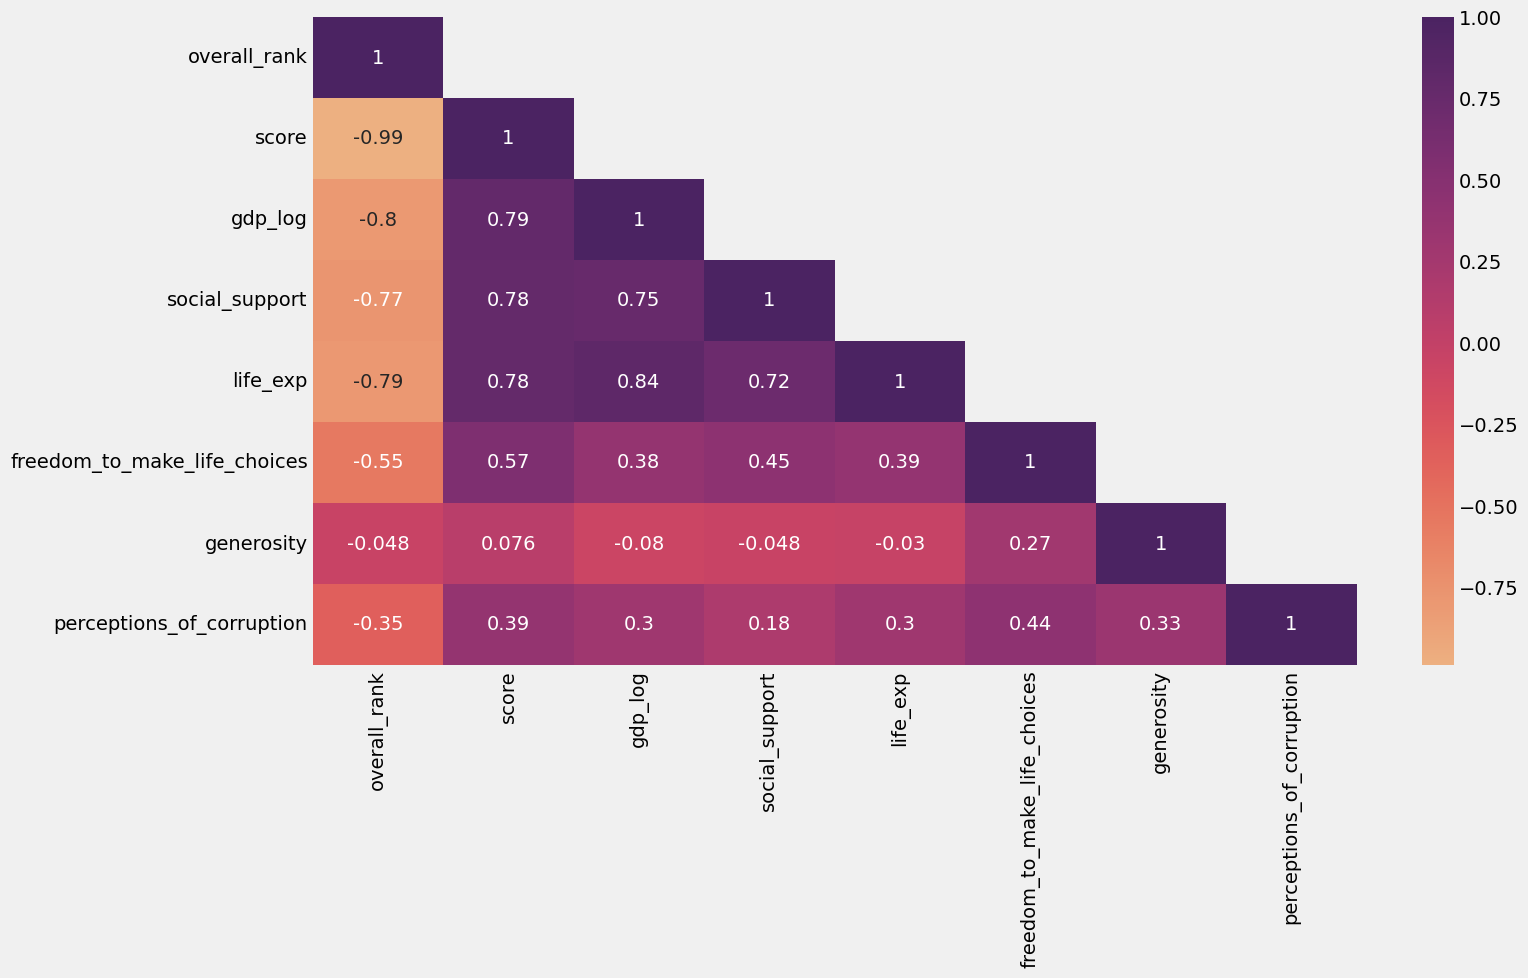

In [158]:
plt.figure(figsize=(15,8))
mask = np.triu(df.corr(),1)
sns.heatmap(df.corr(), annot=True, cmap="flare", mask=mask)
plt.show()

In [183]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]

europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]

north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]

south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]

australia = ["New Zealand", "Australia"]

df["continent"] = np.nan
df.loc[(df["country"].isin(asia)), "continent"] ="Asia"
df.loc[(df["country"].isin(europe)), "continent"] ="Europe"
df.loc[(df["country"].isin(north_america)), "continent"] ="North America"
df.loc[(df["country"].isin(south_america)), "continent"] = "South America"
df.loc[(df["country"].isin(australia)), "continent"] ="Australia"
df.continent.fillna("Africa", inplace=True)

In [184]:
df.head()

,overall_rank,country,score,gdp_log,social_support,life_exp,freedom_to_make_life_choices,generosity,perceptions_of_corruption,continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe


<AxesSubplot: xlabel='score', ylabel='life_exp'>

<Figure size 640x480 with 0 Axes>

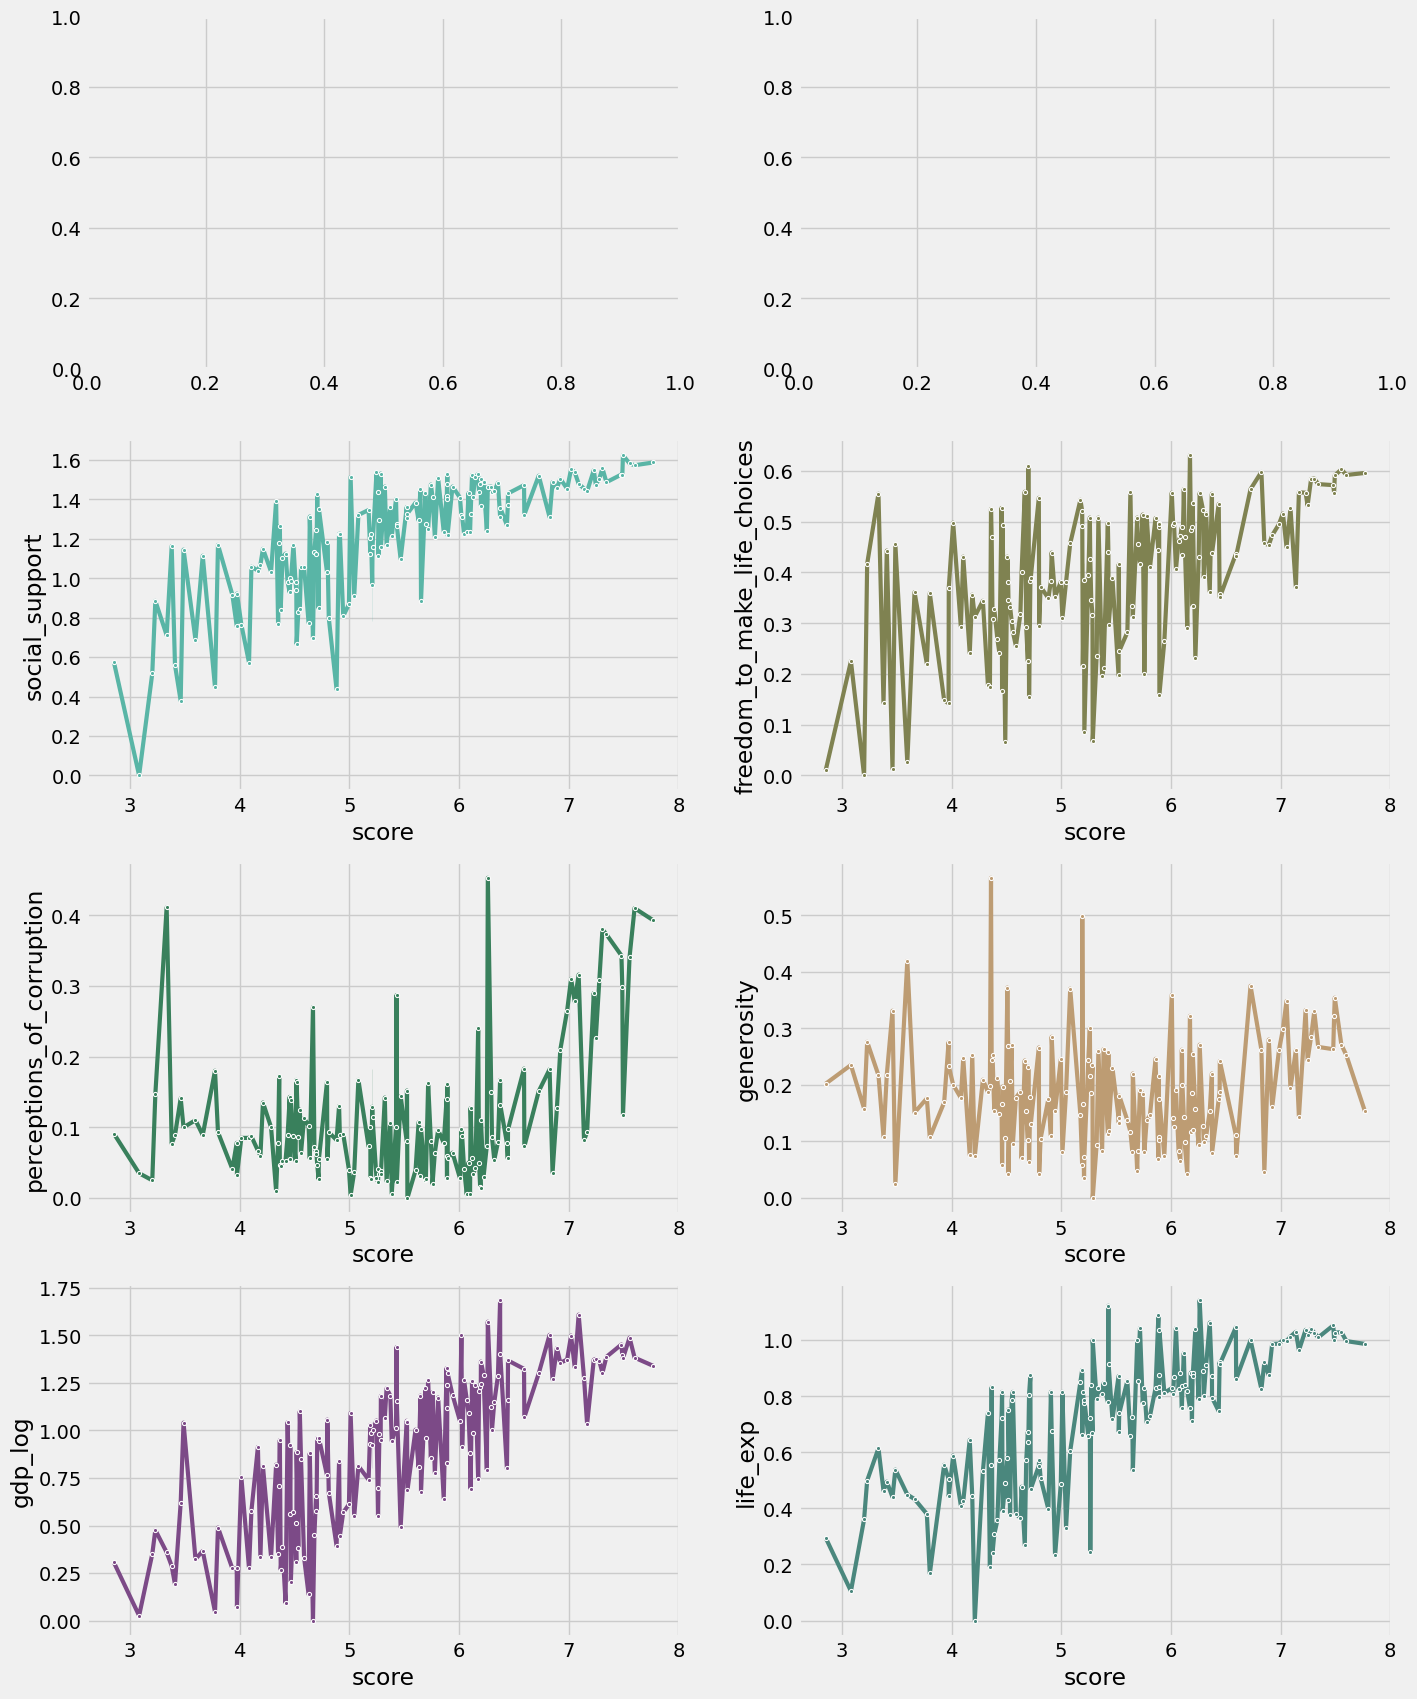

In [161]:
fig = plt. figure()
fig , ax = plt.subplots(4, 2, figsize=(15, 20))
sns.lineplot(data=df, x="score", y="social_support", ax=ax[1,0], linewidth=3, marker=".", color="#59b5a6")
sns.lineplot(data=df, x="score", y="freedom_to_make_life_choices", ax=ax[1,1], linewidth=3, marker=".", color="#7f8251")
sns.lineplot(data=df, x="score", y="perceptions_of_corruption", ax=ax[2,0], linewidth=3, marker=".", color="#39805c")
sns.lineplot(data=df, x="score", y="generosity", ax=ax[2,1], linewidth=3, marker=".", color="#bd9c73")
sns.lineplot(data=df, x="score", y="gdp_log", ax=ax[3,0], linewidth=3, marker=".", color="#7c4a87")
sns.lineplot(data=df, x="score", y="life_exp", ax=ax[3,1], linewidth=3, marker=".", color="#4a877d")


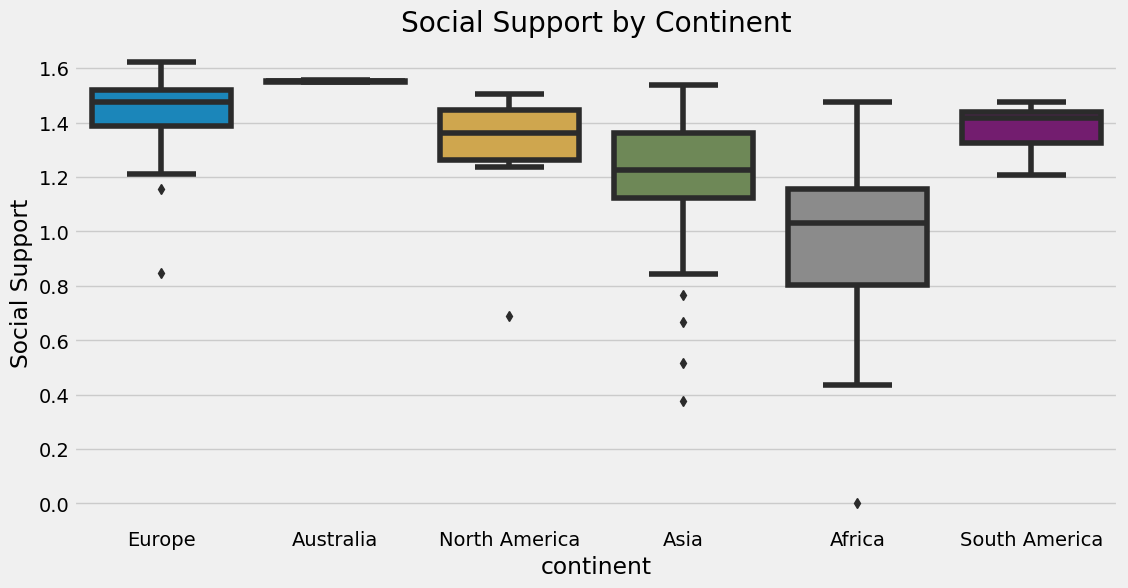

In [162]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["continent"], y=df["social_support"] )
plt.ylabel("Social Support")
plt.title("Social Support by Continent")
plt.show()

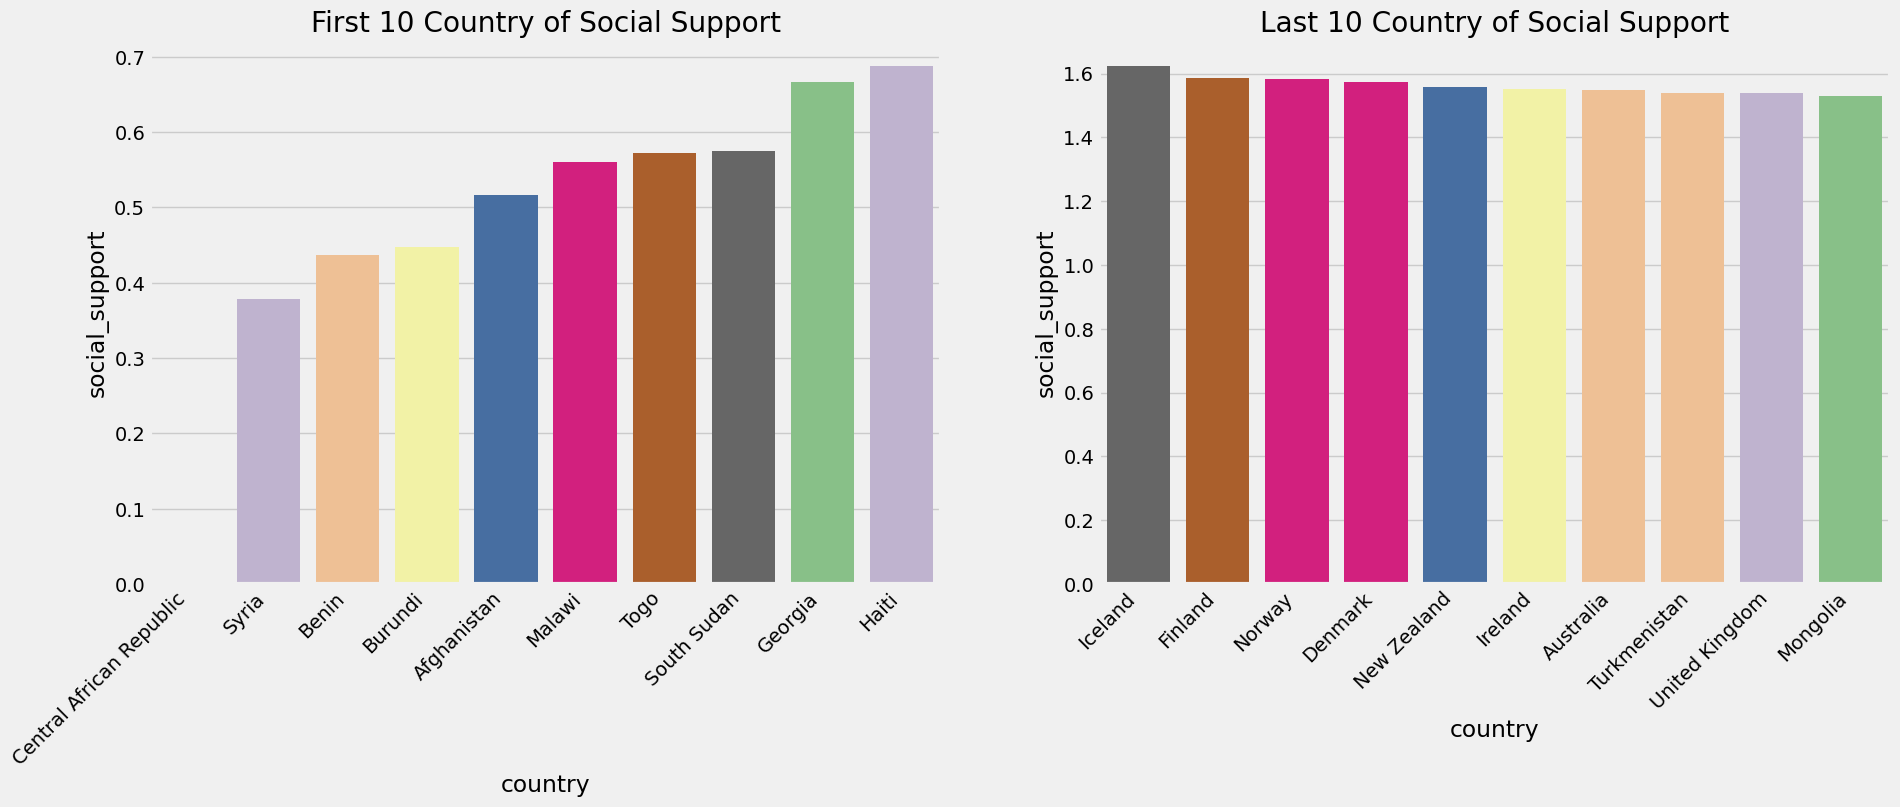

In [163]:
fig , ax = plt.subplots(1,2, figsize=(20,8))

filter = df["social_support"].sort_values(ascending=True)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["social_support"], ax=ax[0], palette="Accent")
ax[0].set_title("First 10 Country of Social Support")
filter = df["social_support"].sort_values(ascending=False)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["social_support"], ax=ax[1], palette="Accent_r")
ax[1].set_title("Last 10 Country of Social Support")
fig.autofmt_xdate(rotation=45 )
plt.show()

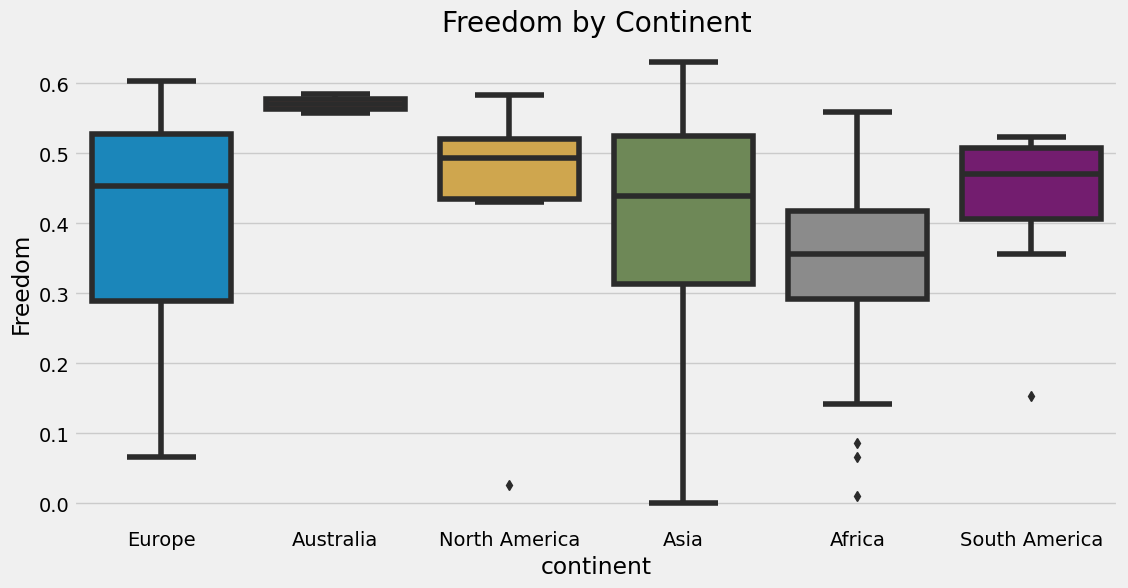

In [164]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["continent"], y=df["freedom_to_make_life_choices"] )
plt.ylabel("Freedom")
plt.title("Freedom by Continent")
plt.show()

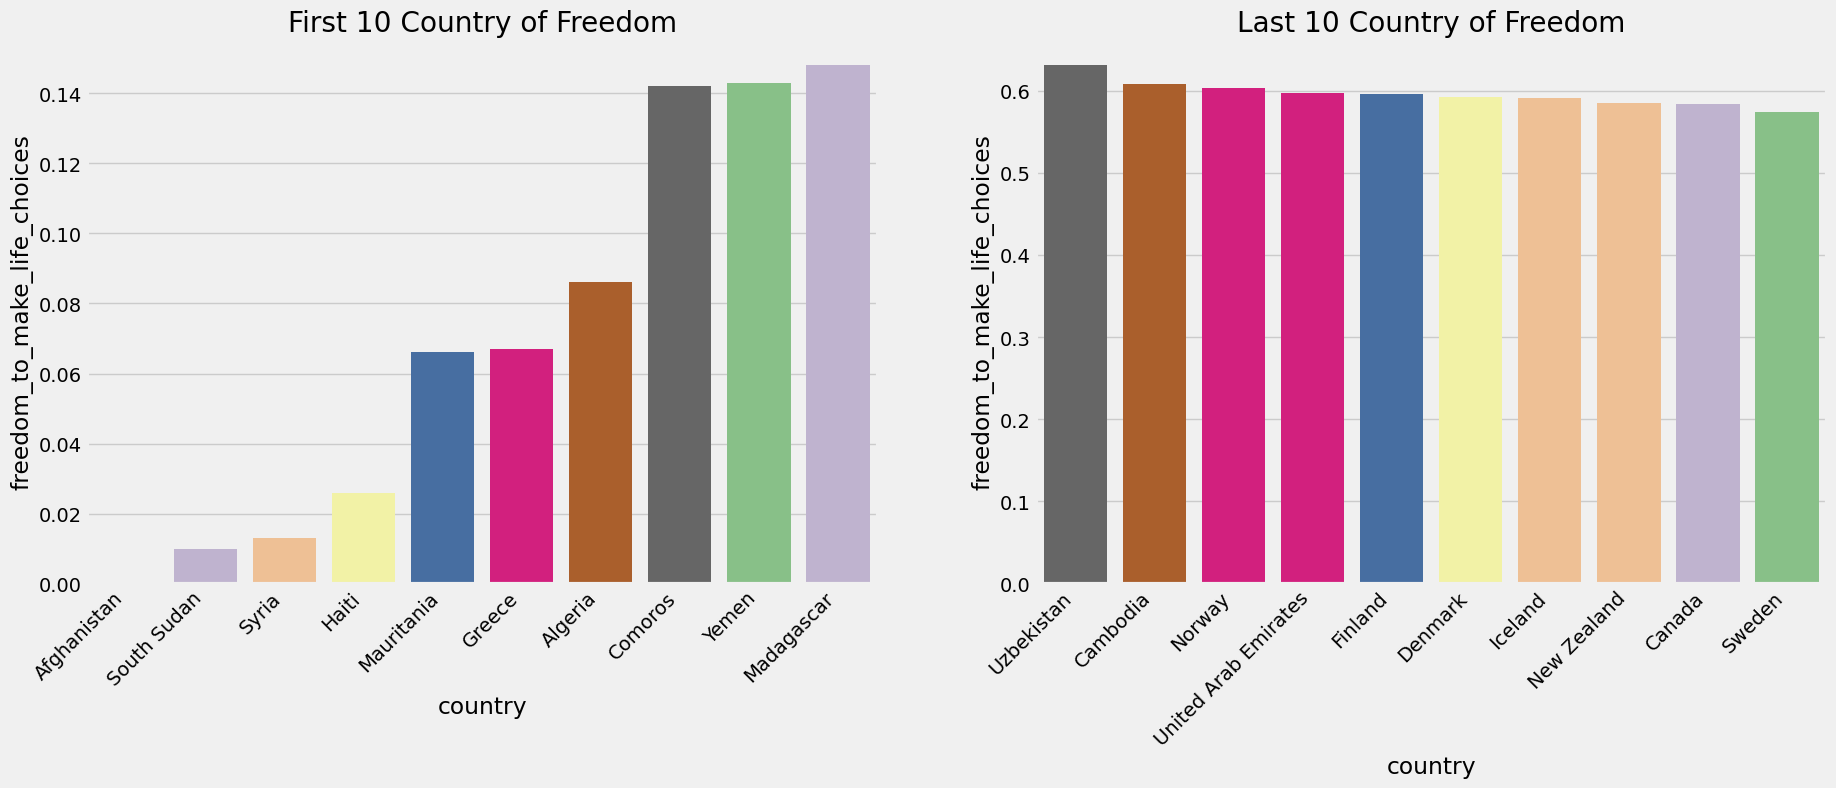

In [165]:
fig , ax = plt.subplots(1,2, figsize=(20,8))

filter = df["freedom_to_make_life_choices"].sort_values(ascending=True)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["freedom_to_make_life_choices"], ax=ax[0], palette="Accent")
ax[0].set_title("First 10 Country of Freedom")

filter = df["freedom_to_make_life_choices"].sort_values(ascending=False)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["freedom_to_make_life_choices"], ax=ax[1], palette="Accent_r")
ax[1].set_title("Last 10 Country of Freedom")

fig.autofmt_xdate(rotation=45 )
plt.show()

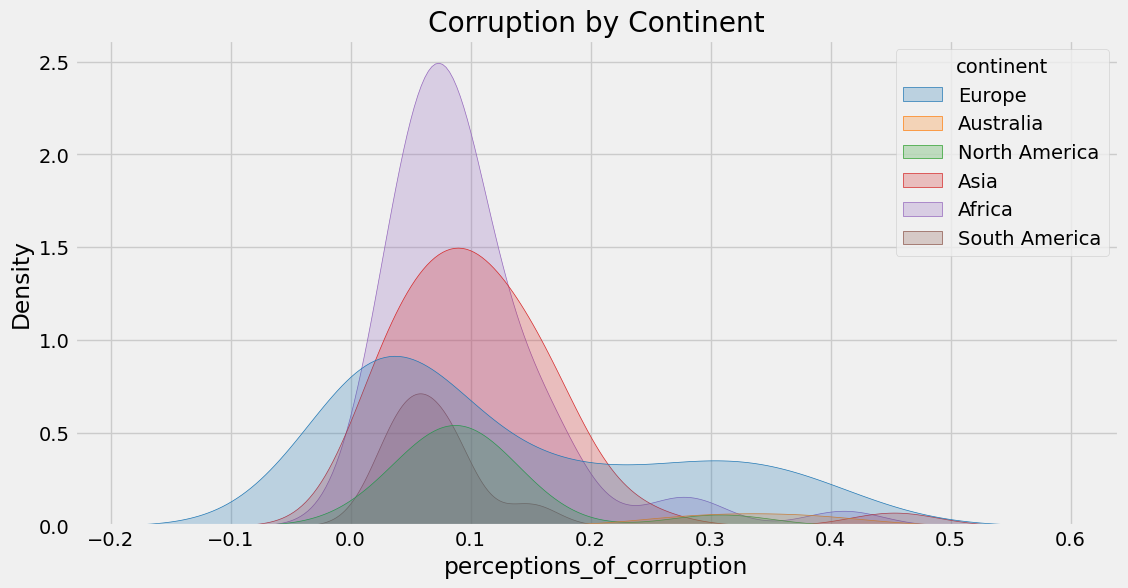

In [166]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df["perceptions_of_corruption"], hue=df["continent"], fill=True, palette="tab10")
plt.title("Corruption by Continent")
plt.show()

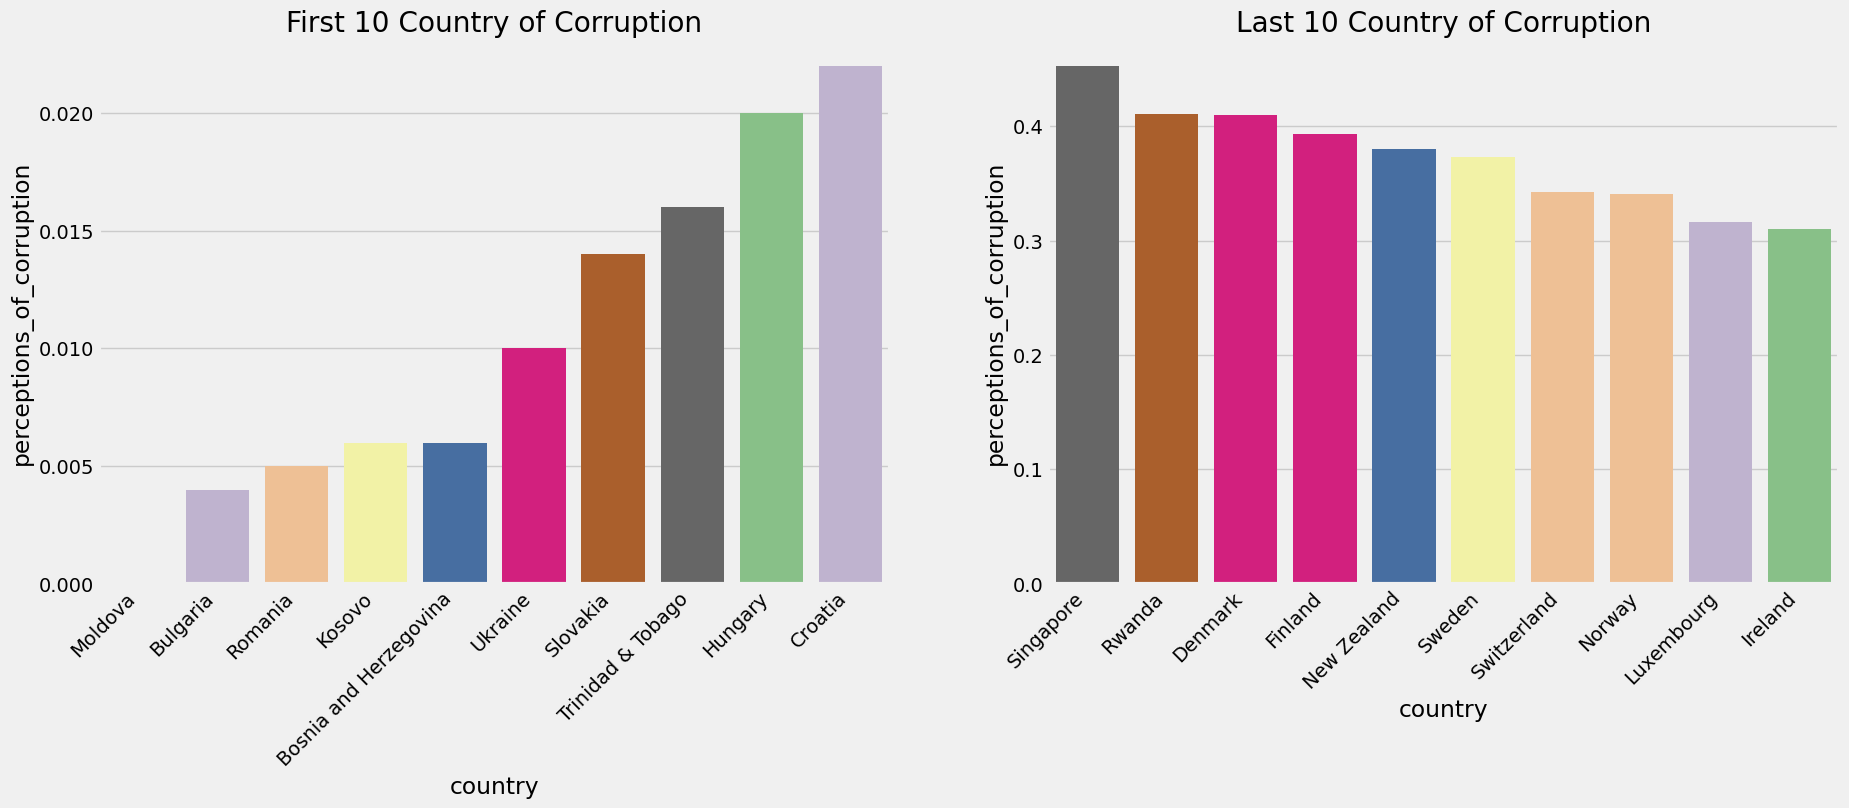

In [167]:
fig , ax = plt.subplots(1,2, figsize=(20,8))

filter = df["perceptions_of_corruption"].sort_values(ascending=True)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["perceptions_of_corruption"], ax=ax[0], palette="Accent")
ax[0].set_title("First 10 Country of Corruption")

filter = df["perceptions_of_corruption"].sort_values(ascending=False)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["perceptions_of_corruption"], ax=ax[1], palette="Accent_r")
ax[1].set_title("Last 10 Country of Corruption")

fig.autofmt_xdate(rotation=45 )
plt.show()

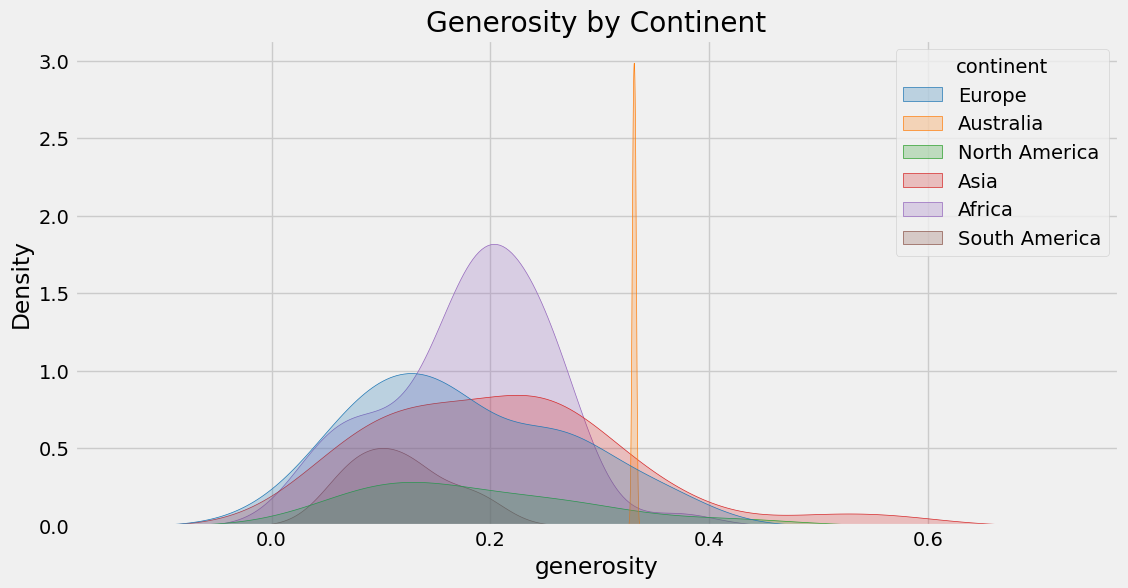

In [168]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df["generosity"], hue=df["continent"], fill=True, palette="tab10")
plt.title("Generosity by Continent")
plt.show()

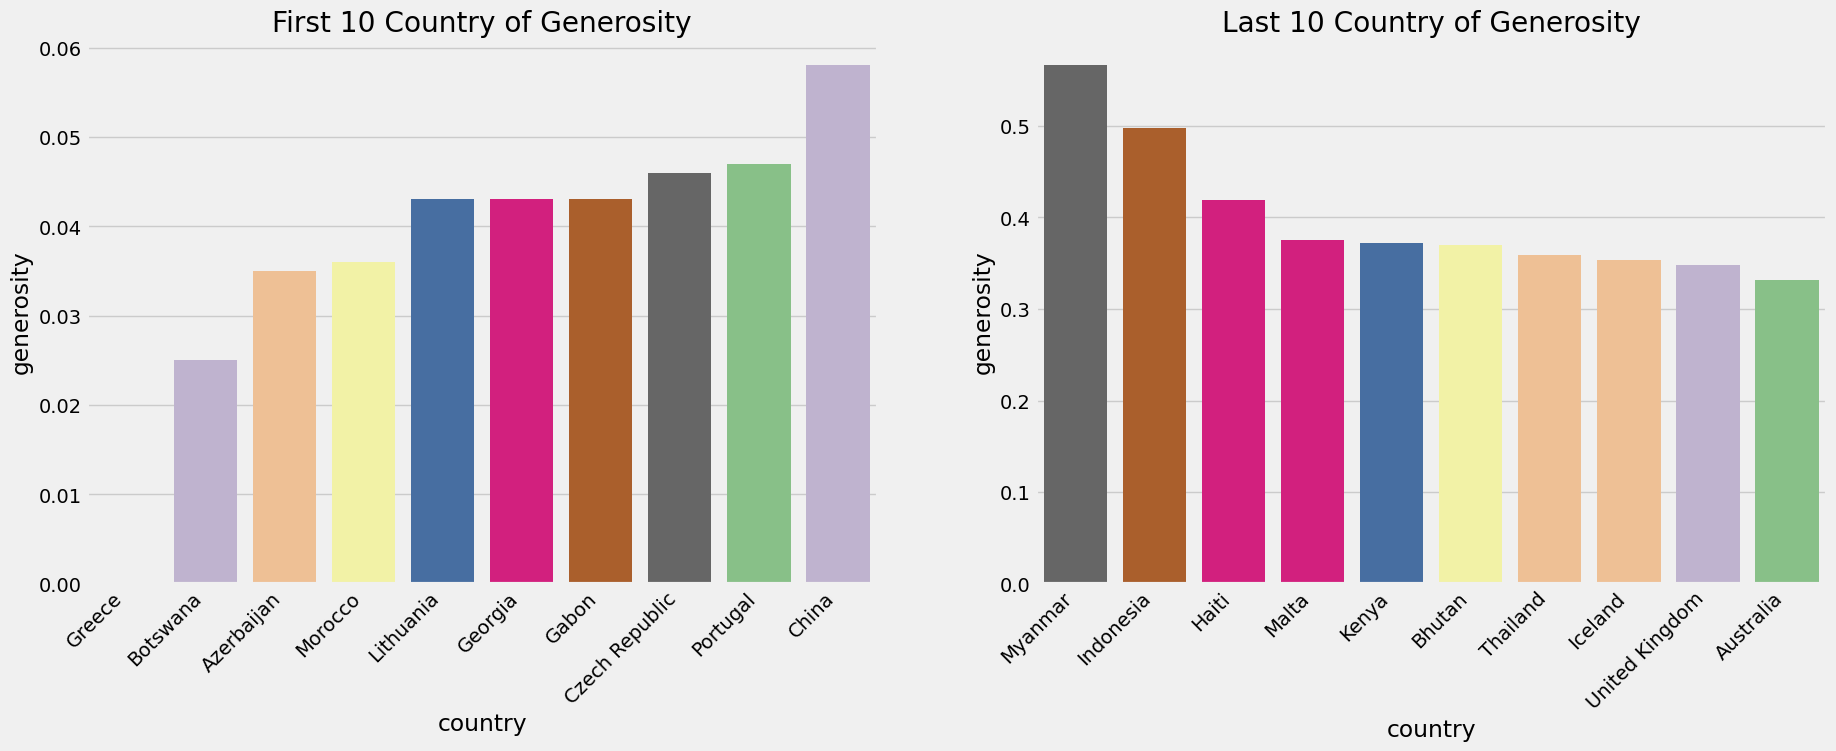

In [169]:
fig , ax = plt.subplots(1,2, figsize=(20,8))

filter = df["generosity"].sort_values(ascending=True)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["generosity"], ax=ax[0], palette="Accent")
ax[0].set_title("First 10 Country of Generosity")

filter = df["generosity"].sort_values(ascending=False)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["generosity"], ax=ax[1], palette="Accent_r")
ax[1].set_title("Last 10 Country of Generosity")

fig.autofmt_xdate(rotation=45 )
plt.show()

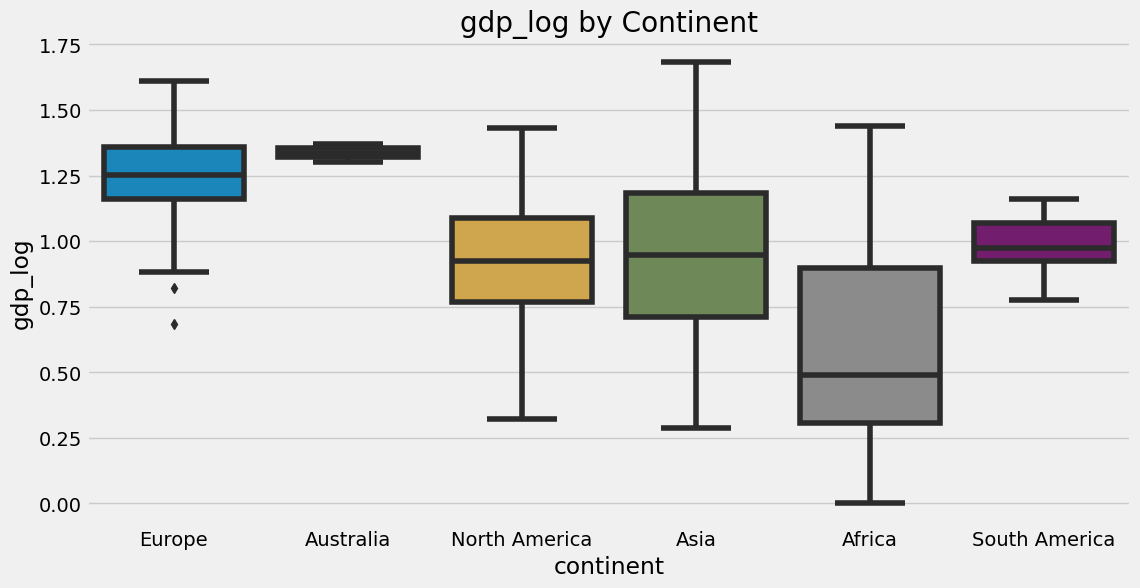

In [170]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df["gdp_log"], x=df["continent"])
plt.title("gdp_log by Continent")
plt.show()

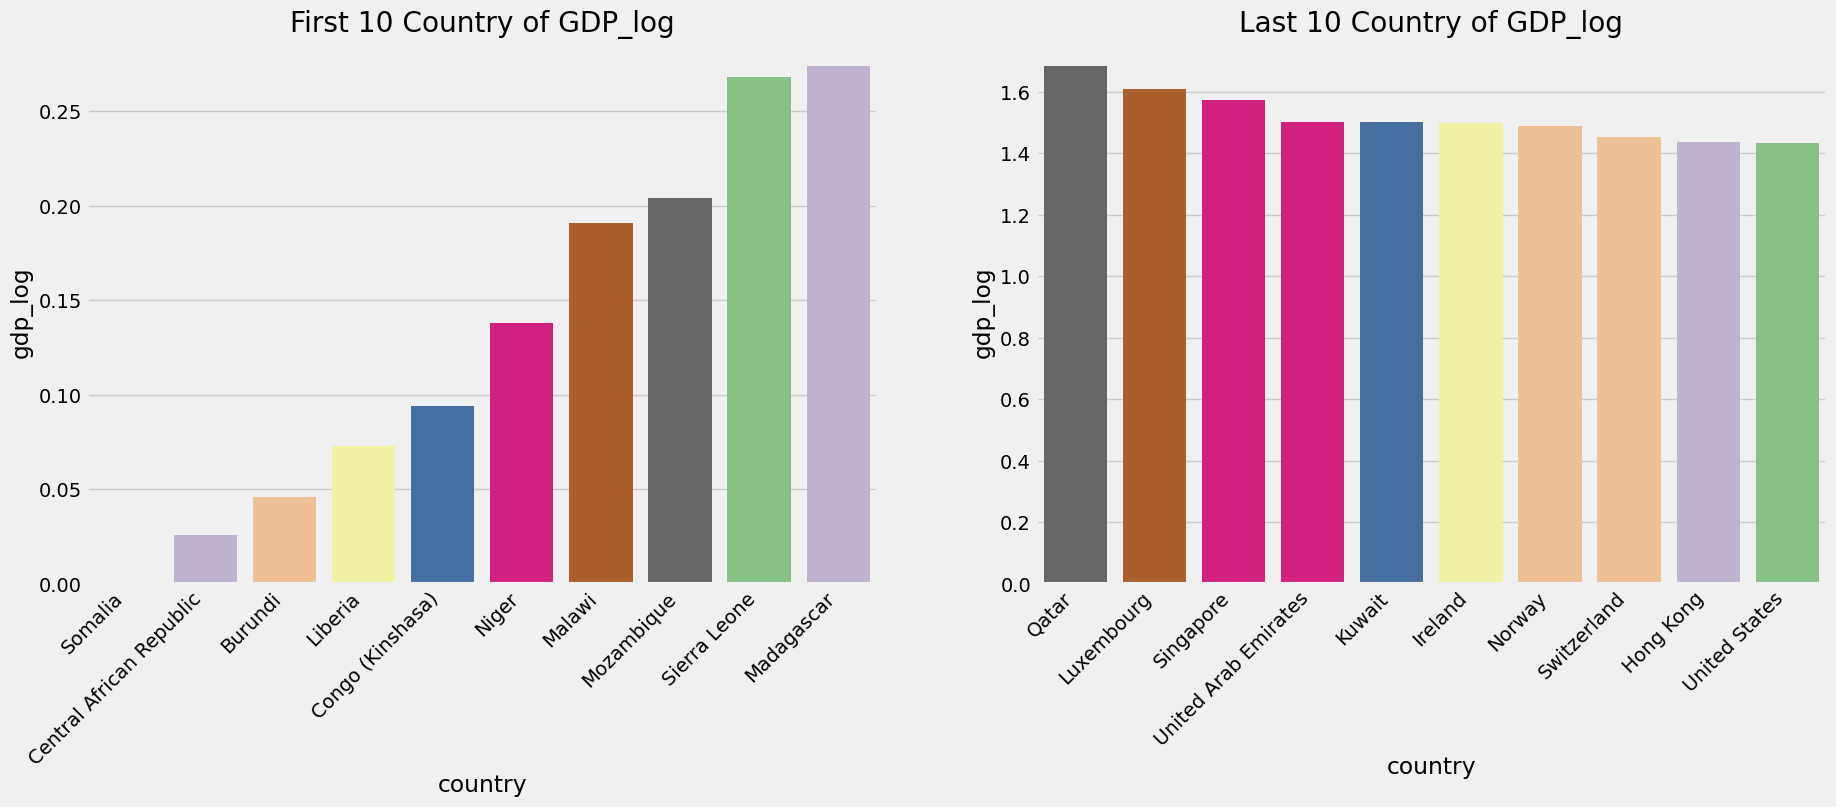

In [171]:
fig , ax = plt.subplots(1,2, figsize=(20,8))

filter = df["gdp_log"].sort_values(ascending=True)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["gdp_log"], ax=ax[0], palette="Accent")
ax[0].set_title("First 10 Country of GDP_log")

filter = df["gdp_log"].sort_values(ascending=False)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["gdp_log"], ax=ax[1], palette="Accent_r")
ax[1].set_title("Last 10 Country of GDP_log")

fig.autofmt_xdate(rotation=45 )
plt.show()

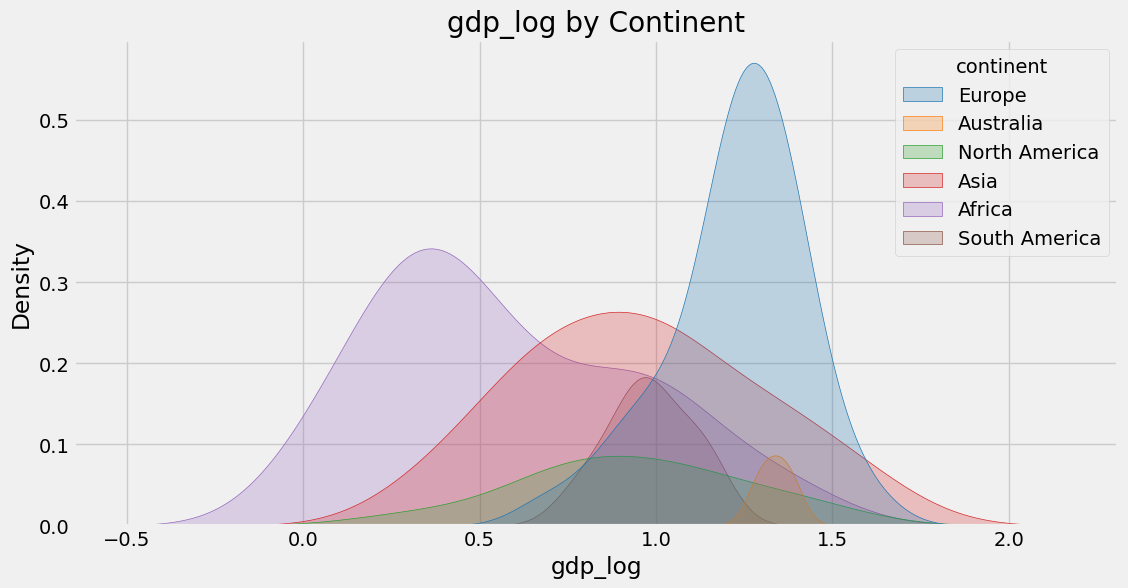

In [172]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df["gdp_log"], hue=df["continent"], fill=True, palette="tab10")
plt.title("gdp_log by Continent")
plt.show()

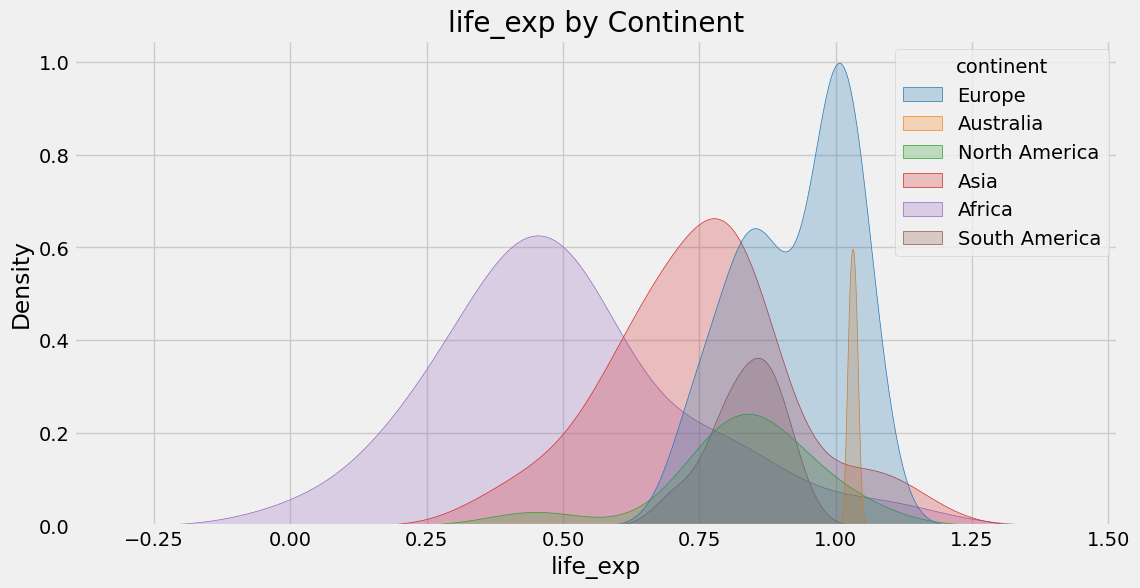

In [173]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df["life_exp"], hue=df["continent"], fill=True, palette="tab10")
plt.title("life_exp by Continent")
plt.show()

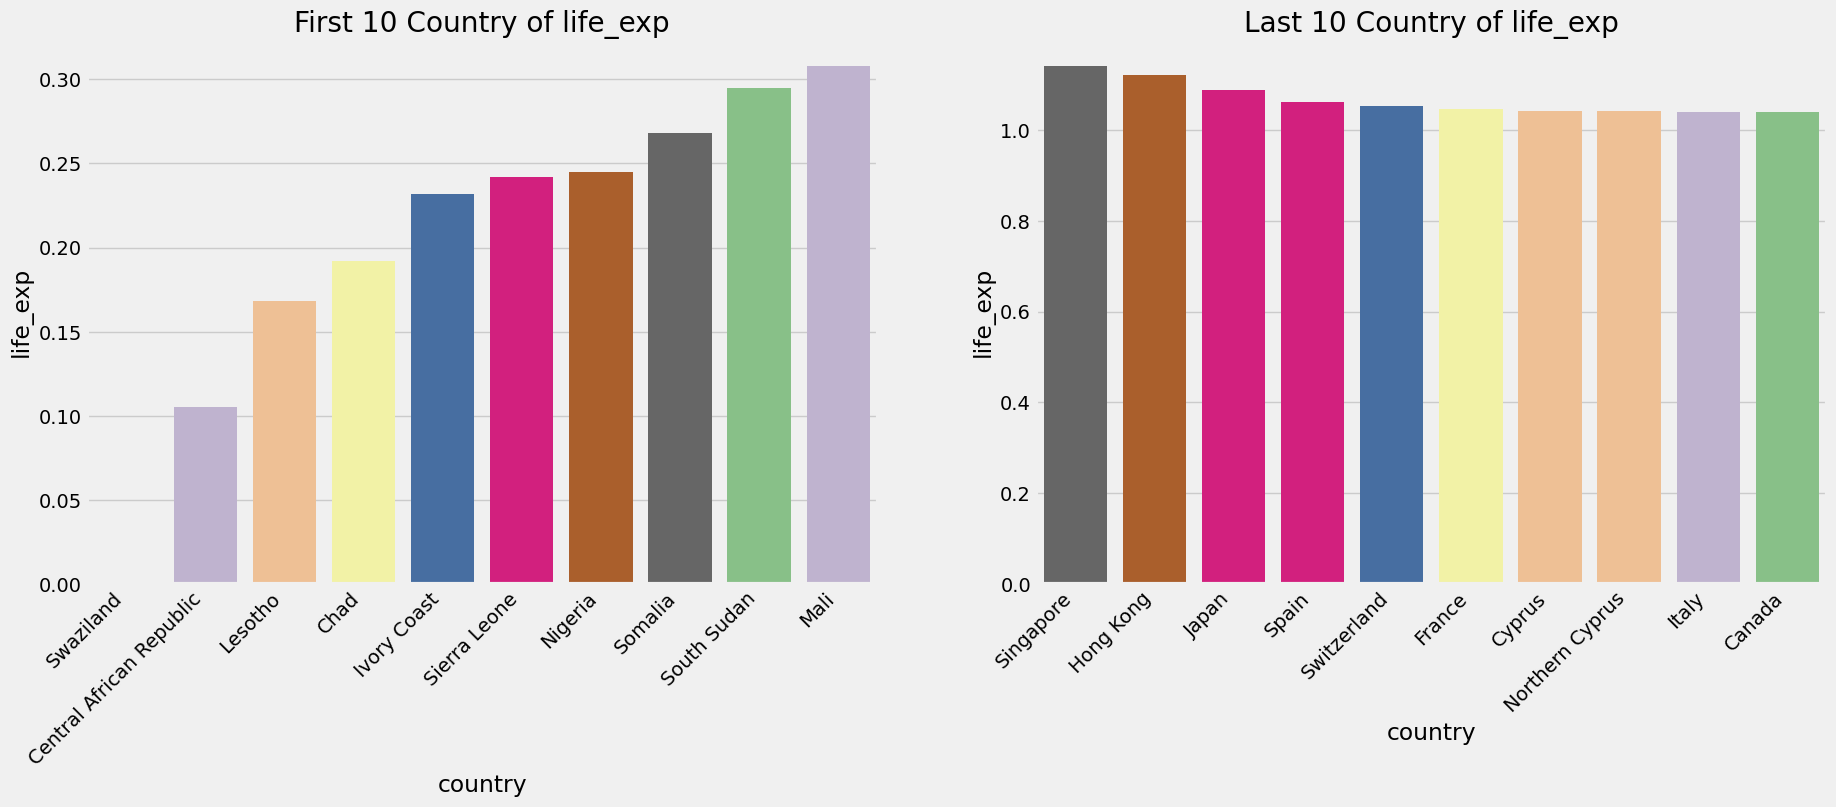

In [174]:
fig , ax = plt.subplots(1,2, figsize=(20,8))

filter = df["life_exp"].sort_values(ascending=True)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["life_exp"], ax=ax[0], palette="Accent")
ax[0].set_title("First 10 Country of life_exp")

filter = df["life_exp"].sort_values(ascending=False)[:10].index
sns.barplot(x = df.iloc[filter]["country"], y=df["life_exp"], ax=ax[1], palette="Accent_r")
ax[1].set_title("Last 10 Country of life_exp")

fig.autofmt_xdate(rotation=45 )
plt.show()

In [175]:
mean_happiness = df.groupby("continent")[["score"]].mean()
mean_happiness = mean_happiness.sort_values(by=["score"], ascending=False)
mean_happiness

,score
continent,
Australia,7.267500
Europe,6.293350
North America,6.151583
South America,5.920200
Asia,5.214341
Africa,4.518216


In [176]:
# getting the mean of all other regions aside Europe to test the hypothesis
data = {
    "continent": ['Australia', 'North America', 'South America', 'Asia', 'Africa', 'Europe'],
    "score": [7.267500, 6.293350,6.151583, 5.920200, 5.214341, 4.518216]
}
df = pd.DataFrame(data)

# Filter data for the specific months
continents_of_interest = ['Australia', 'North America', 'Asia', 'South America', 'Africa']
filtered_data = df[df["continent"].isin(continents_of_interest)]

# Calculate the mean of the salaries in the filtered data
mean_score_of_interest = filtered_data["score"].mean()

print("Mean happiness score for the regions of interest:", mean_score_of_interest)


# Specify the hypothesized population mean 
hypothesized_mean = 6.293350

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(filtered_data["score"], hypothesized_mean)

# Define the confidence level (in this case, 95%)
confidence_level = 0.95

# Calculate the critical t-value for the specified confidence level and degrees of freedom
degrees_of_freedom = len(filtered_data) - 1
critical_t = stats.t.ppf(confidence_level, df=degrees_of_freedom)

# Determine if the mean is at a 95% confidence level
is_confident = abs(t_stat) <= critical_t

print("Calculated Mean Score:", mean_score_of_interest)
print("Hypothesized Mean:", hypothesized_mean)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Critical T-Value for 95% Confidence:", critical_t)
print("Is European Mean at 95% Confidence Level?", is_confident)

Mean happiness score for the regions of interest: 6.169394800000001
Calculated Mean Score: 6.169394800000001
Hypothesized Mean: 6.29335
T-Statistic: -0.37410110901392496
P-Value: 0.7273151284248551
Critical T-Value for 95% Confidence: 2.13184678133629
Is European Mean at 95% Confidence Level? True


In [185]:
mean_gdp = df.groupby("continent")[["gdp_log"]].mean()
mean_gdp = mean_gdp.sort_values(by=["gdp_log"], ascending=False)
mean_gdp

,gdp_log
continent,
Australia,1.337500
Europe,1.226900
South America,0.982700
Asia,0.951146
North America,0.929167
Africa,0.578000


In [187]:
# getting the mean of all other regions aside Europe to test the hypothesis
data = {
    "continent": ['Australia', 'North America', 'South America', 'Asia', 'Africa', 'Europe'],
    "gdp_log": [1.337500, 1.226900, 0.982700, 0.951146, 0.929167, 0.578000]
}
df = pd.DataFrame(data)

# Filter data for the specific months
continents_of_interest = ['Australia', 'North America', 'Europe', 'South America', 'Africa']
filtered_data = df[df["continent"].isin(continents_of_interest)]

# Calculate the mean of the salaries in the filtered data
mean_GDP_of_interest = filtered_data["gdp_log"].mean()

print("Mean GDP score for the regions of interest:", mean_GDP_of_interest)


# Specify the hypothesized population mean 
hypothesized_mean = 0.951146

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(filtered_data["gdp_log"], hypothesized_mean)

# Define the confidence level (in this case, 95%)
confidence_level = 0.90
# Calculate the critical t-value for the specified confidence level and degrees of freedom
degrees_of_freedom = len(filtered_data) - 1
critical_t = stats.t.ppf(confidence_level, df=degrees_of_freedom)

# Determine if the mean is at a 95% confidence level
is_confident = abs(t_stat) <= critical_t

print("Calculated Mean GDP:", mean_GDP_of_interest)
print("Hypothesized Mean:", hypothesized_mean)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Critical T-Value for 95% Confidence:", critical_t)
print("Is Asian GDP Mean at 95% Confidence Level?", is_confident)

Mean GDP score for the regions of interest: 1.0108534
Calculated Mean GDP: 1.0108534
Hypothesized Mean: 0.951146
T-Statistic: 0.4525096549031488
P-Value: 0.6743578632620502
Critical T-Value for 95% Confidence: 1.5332062737131438
Is Asian GDP Mean at 95% Confidence Level? True
